In [14]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as sig

In [45]:
B = 0.5
f_c = 1000
N = 1000
dt = 0.1

T = np.linspace(-6, 6, N)
freqs = np.arange(1000)/1000*B

x = np.cos(2*np.pi*B*T) + 2*np.cos(2*np.pi*2.4*B*T + 3)

In [46]:
x_m = np.cos(2*np.pi*f_c*T)*x

In [47]:
x_md = np.cos(2*np.pi*f_c*T)*x_m

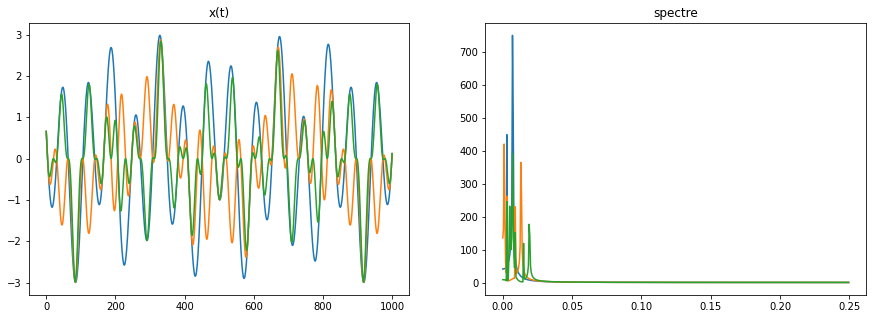

In [48]:
# Affichage
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(x)
plt.plot(x_m)
plt.plot(x_md)
plt.title('x(t)')

plt.subplot(1, 2, 2)
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x)[:N//2]))
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_m)[:N//2]))
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_md)[:N//2]))
plt.title('spectre')

plt.show()

In [49]:
def FiltrePB(y, dt, N_filter, fc):
    num_low, den_low = sig.butter(N_filter, fc, btype='lowpass', fs=1/dt)
    y_low = sig.filtfilt(num_low, den_low, y)
    return y_low

x_mdf = FiltrePB(x_md, 0.1, 2, 2*B)

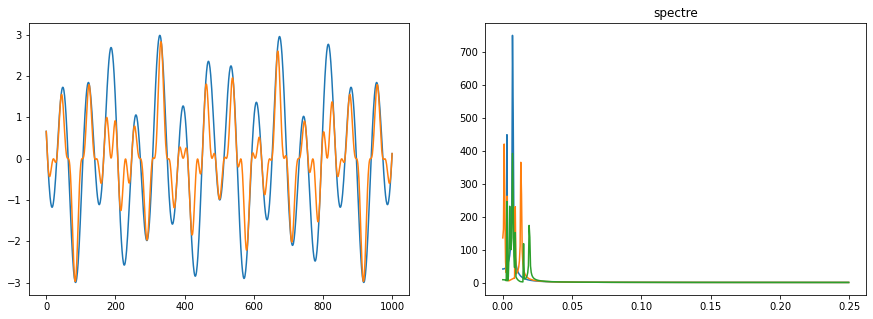

In [50]:
# Affichage
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(x)
#plt.plot(x_m)
#plt.plot(x_md)
plt.plot(x_mdf)

plt.subplot(1, 2, 2)
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x)[:N//2]))
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_m)[:N//2]))
#plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_md)[:N//2]))
plt.plot(freqs[:N//2], np.abs(np.fft.fft(x_mdf)[:N//2]))
plt.title('spectre')

plt.show()

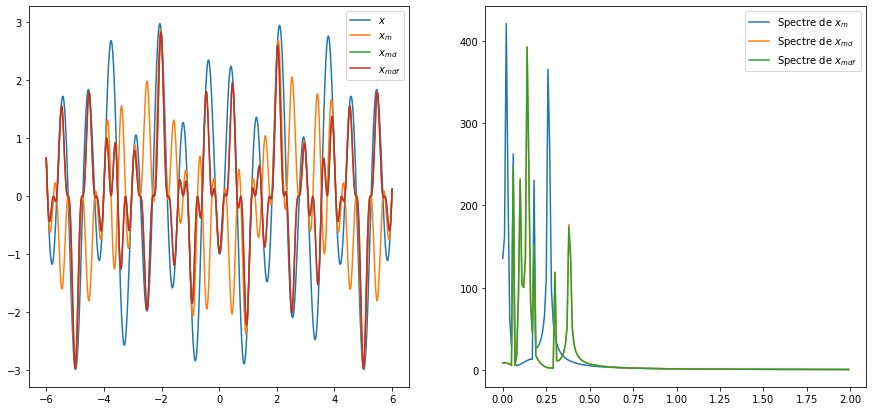

In [52]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x, label='$x$')
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.plot(T, x_mdf, label='$x_{mdf}$')
plt.legend()

#Affichage du spectre
freqs = np.linspace(0,2*np.pi*(N-1)/N/dt,N)/2/np.pi
plt.subplot(1,2,2)
#plt.plot(freqs[:N//20], np.abs(np.fft.fft(x)[:N//20]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_mdf)[:N//5]), label='Spectre de $x_{mdf}$')
plt.legend()

Après modulation et démodulation, on a le signal suivant :

   \begin{array}{r c l}
   x_{md}(t)  & = & x(t)cos(2\pi f_c t)^2 \\
   & = & x(t)\frac{1}{2}[1+cos(4\pi f_c t)] \\
   \end{array}
Donc pour retrouver le signal d'origine $x(t)$, il suffit de couper la partie en $cos(4\pi f_c t)$ dans l'expression de $x_{md}(t)$ à l'aide d'un filtre passe bas de fréquence de coupure inférieure à $2f_c$ mais supérieure à $B$ pour garder les fréquences du signal d'origine.
On choisira donc cette fréquence de coupure à $2B$.